# DKASC_爱丽丝泉_数据筛选

程序从原始下载数据中筛选用于训练集和测试集，输出

In [1]:
import os
import random
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import math
# import tensorflow as tf
# import keras
#import torch
# import catboost as cb
from pandas import read_csv
from math import sqrt
# from numpy import concatenate
# from keras.models import Sequential
# from keras.layers import Dense
# from keras.layers import Dropout
# from keras.layers import LSTM
# from sklearn.preprocessing import MinMaxScaler
# from sklearn.metrics import mean_squared_error
# from keras.layers.core import Dense, Activation, Dropout
%matplotlib inline

In [2]:
# import os
# os.environ["CUDA_VISIBLE_DEVICES"] = "0"
# config = tf.ConfigProto(allow_soft_placement = True)
# gpu_options = tf.GPUOptions(per_process_gpu_memory_fraction = 0.5)
# config.gpu_options.allow_growth = True
# sess0 = tf.InteractiveSession(config = config)

In [3]:
print(os.getcwd()) # 打印当前工作目录

E:\Research Project\DKASC, Alice Springs


In [4]:
os.listdir(os.getcwd())

['.ipynb_checkpoints',
 '101-Site_DKA-WeatherStation',
 '96-Site_DKA-MasterMeter1',
 'Alice_SpringsLSTM.ipynb',
 'Alice_SpringsWPD-LSTM.ipynb',
 'Alice_Springs_2016-2020',
 'Alice_Springs数据集筛选提取.ipynb',
 'Dataset',
 'logs',
 'picture',
 'Predict',
 'Program backups',
 'temp',
 'test1-8_SVM&BP&DNN&LSTM.ipynb',
 'WPD.ipynb',
 '笔记.ipynb',
 '训练SVM&BP&DNN&LSTM.ipynb']

In [5]:
os.chdir("./Alice_Springs_2016-2020/")

In [6]:
os.listdir()

['3D.jpg',
 'Alice_Springs_2016.csv',
 'Alice_Springs_2017.csv',
 'Alice_Springs_2018.csv',
 'Alice_Springs_2019.csv',
 'Alice_Springs_2020.csv']

In [7]:
#train1 = pd.read_csv('Alice_Springs_2016.csv')
#train2 = pd.read_csv('Alice_Springs_2017.csv')
train3 = pd.read_csv('Alice_Springs_2018.csv')
train4 = pd.read_csv('Alice_Springs_2019.csv')
#train4['GRP'] = 4
test = pd.read_csv('Alice_Springs_2020.csv')


In [8]:
#查看输入数据维度
#print(train1.shape)
#print(train2.shape)
print(train3.shape)
print(train4.shape)

print(test.shape)

(105229, 53)
(105321, 53)
(29700, 53)


In [9]:
#train = pd.concat([train1,train2,train3,train4],axis=0)
train = pd.concat([train3,train4],axis=0)    #连接两个训练集 并查看数据维度
print(train.shape)
train.head(10)

(210550, 53)


,Timestamp,1A Trina - Active Power (kW),1B Trina - Active Power (kW),2 eco-Kinetics - Active Power (kW),3 BP Solar - Active Power (kW),4 Kyocera - Active Power (kW),5 Kyocera - Active Power (kW),6 Kyocera - Active Power (kW),7 First Solar - Active Power (kW),8 Kaneka - Active Power (kW),...,DKA.MasterMeter2 - Active Power (kW),DKA.WeatherStation - Wind Speed (m/s),DKA.WeatherStation - Weather Temperature Celsius (°C),DKA.WeatherStation - Weather Relative Humidity (%),DKA.WeatherStation - Global Horizontal Radiation (W/m²),DKA.WeatherStation - Diffuse Horizontal Radiation (W/m²),DKA.WeatherStation - Wind Direction (Degrees),DKA.WeatherStation - Weather Daily Rainfall (mm),DKA.WeatherStation - Radiation Global Tilted (W/m²),DKA.WeatherStation - Radiation Diffuse Tilted (W/m²)
0,2018/1/1 0:00,0.0,0.0,-0.008200,0.000267,0.0,0.0,-0.02,0.000200,0.0,...,NaN,NaN,27.911371,29.940123,3.595562,2.240332,316.830688,0.0,NaN,NaN
1,2018/1/1 0:05,0.0,0.0,-0.006800,0.000200,0.0,0.0,-0.02,0.000400,0.0,...,NaN,NaN,27.666079,31.129065,3.695016,2.339242,333.421692,0.0,NaN,NaN
2,2018/1/1 0:10,0.0,0.0,-0.006433,0.000267,0.0,0.0,-0.02,0.000200,0.0,...,NaN,NaN,27.433355,31.153343,2.940332,1.543966,322.772247,0.0,NaN,NaN
3,2018/1/1 0:15,0.0,0.0,-0.007167,0.000400,0.0,0.0,-0.02,0.000067,0.0,...,NaN,NaN,27.948530,30.060120,1.683121,0.621979,331.774689,0.0,NaN,NaN
4,2018/1/1 0:20,0.0,0.0,-0.006567,0.000333,0.0,0.0,-0.02,-0.000067,0.0,...,NaN,NaN,28.748331,28.336712,1.280866,0.627035,334.676544,0.0,NaN,NaN
5,2018/1/1 0:25,0.0,0.0,-0.006867,0.000067,0.0,0.0,-0.02,0.000133,0.0,...,NaN,NaN,29.084066,27.650440,1.259595,0.632595,331.822601,0.0,NaN,NaN
6,2018/1/1 0:30,0.0,0.0,-0.009000,0.000200,0.0,0.0,-0.02,0.000267,0.0,...,NaN,NaN,29.144590,27.566601,1.401111,0.642391,336.971619,0.0,NaN,NaN
7,2018/1/1 0:35,0.0,0.0,-0.008600,0.000200,0.0,0.0,-0.02,0.000067,0.0,...,NaN,NaN,29.221727,27.482796,1.458233,0.646050,339.344757,0.0,NaN,NaN
8,2018/1/1 0:40,0.0,0.0,-0.007533,0.000267,0.0,0.0,-0.02,0.000333,0.0,...,NaN,NaN,29.229469,27.541845,1.660645,0.652419,337.869324,0.0,NaN,NaN
9,2018/1/1 0:45,0.0,0.0,-0.007367,0.000267,0.0,0.0,-0.02,0.000133,0.0,...,NaN,NaN,29.242725,27.662283,1.718909,0.651290,329.264923,0.0,NaN,NaN


# 数据预处理

设定索引为日期，方便按日期筛选

In [10]:
# 设定索引为日期，方便按日期筛选
train.set_index('Timestamp', inplace=True,drop=False)
test.set_index('Timestamp', inplace=True,drop=False)

In [11]:
train.head()

,Timestamp,1A Trina - Active Power (kW),1B Trina - Active Power (kW),2 eco-Kinetics - Active Power (kW),3 BP Solar - Active Power (kW),4 Kyocera - Active Power (kW),5 Kyocera - Active Power (kW),6 Kyocera - Active Power (kW),7 First Solar - Active Power (kW),8 Kaneka - Active Power (kW),...,DKA.MasterMeter2 - Active Power (kW),DKA.WeatherStation - Wind Speed (m/s),DKA.WeatherStation - Weather Temperature Celsius (°C),DKA.WeatherStation - Weather Relative Humidity (%),DKA.WeatherStation - Global Horizontal Radiation (W/m²),DKA.WeatherStation - Diffuse Horizontal Radiation (W/m²),DKA.WeatherStation - Wind Direction (Degrees),DKA.WeatherStation - Weather Daily Rainfall (mm),DKA.WeatherStation - Radiation Global Tilted (W/m²),DKA.WeatherStation - Radiation Diffuse Tilted (W/m²)
Timestamp,,,,,,,,,,,,,,,,,,,,,
2018/1/1 0:00,2018/1/1 0:00,0.0,0.0,-0.008200,0.000267,0.0,0.0,-0.02,0.000200,0.0,...,NaN,NaN,27.911371,29.940123,3.595562,2.240332,316.830688,0.0,NaN,NaN
2018/1/1 0:05,2018/1/1 0:05,0.0,0.0,-0.006800,0.000200,0.0,0.0,-0.02,0.000400,0.0,...,NaN,NaN,27.666079,31.129065,3.695016,2.339242,333.421692,0.0,NaN,NaN
2018/1/1 0:10,2018/1/1 0:10,0.0,0.0,-0.006433,0.000267,0.0,0.0,-0.02,0.000200,0.0,...,NaN,NaN,27.433355,31.153343,2.940332,1.543966,322.772247,0.0,NaN,NaN
2018/1/1 0:15,2018/1/1 0:15,0.0,0.0,-0.007167,0.000400,0.0,0.0,-0.02,0.000067,0.0,...,NaN,NaN,27.948530,30.060120,1.683121,0.621979,331.774689,0.0,NaN,NaN
2018/1/1 0:20,2018/1/1 0:20,0.0,0.0,-0.006567,0.000333,0.0,0.0,-0.02,-0.000067,0.0,...,NaN,NaN,28.748331,28.336712,1.280866,0.627035,334.676544,0.0,NaN,NaN


In [12]:
test.head()

,Timestamp,1A Trina - Active Power (kW),1B Trina - Active Power (kW),2 eco-Kinetics - Active Power (kW),3 BP Solar - Active Power (kW),4 Kyocera - Active Power (kW),5 Kyocera - Active Power (kW),6 Kyocera - Active Power (kW),7 First Solar - Active Power (kW),8 Kaneka - Active Power (kW),...,DKA.MasterMeter2 - Active Power (kW),DKA.WeatherStation - Wind Speed (m/s),DKA.WeatherStation - Weather Temperature Celsius (°C),DKA.WeatherStation - Weather Relative Humidity (%),DKA.WeatherStation - Global Horizontal Radiation (W/m²),DKA.WeatherStation - Diffuse Horizontal Radiation (W/m²),DKA.WeatherStation - Wind Direction (Degrees),DKA.WeatherStation - Weather Daily Rainfall (mm),DKA.WeatherStation - Radiation Global Tilted (W/m²),DKA.WeatherStation - Radiation Diffuse Tilted (W/m²)
Timestamp,,,,,,,,,,,,,,,,,,,,,
2020/1/1 0:00,2020/1/1 0:00,0.0,0.0,0.008233,0.000533,0.0,0.0,-0.020000,-0.01,0.0,...,-0.113126,NaN,29.685360,21.727171,1.360221,1.191879,33.216167,0.0,2.958199,0.524153
2020/1/1 0:05,2020/1/1 0:05,0.0,0.0,0.008233,0.000400,0.0,0.0,-0.019967,-0.01,0.0,...,-0.113157,NaN,29.559967,21.878902,1.532208,1.460944,33.254341,0.0,3.288470,0.764565
2020/1/1 0:10,2020/1/1 0:10,0.0,0.0,0.007900,0.000267,0.0,0.0,-0.019900,-0.01,0.0,...,-0.113250,NaN,29.530006,21.859453,1.186835,1.118219,33.302616,0.0,3.253541,0.725652
2020/1/1 0:15,2020/1/1 0:15,0.0,0.0,0.008433,0.000267,0.0,0.0,-0.019933,-0.01,0.0,...,-0.113209,NaN,29.474438,21.897285,1.017349,0.824890,33.337837,0.0,3.260514,0.706365
2020/1/1 0:20,2020/1/1 0:20,0.0,0.0,0.008567,0.000267,0.0,0.0,-0.020000,-0.01,0.0,...,-0.113048,NaN,29.365288,22.085625,1.323369,1.175776,33.375069,0.0,3.148183,0.694154


训练集除空

In [13]:
print('训练集初始维度：',train.shape)
train.dropna(axis="columns", how='all', inplace=True)  #删除掉训练集全是空值的列
train.dropna(axis="index", how='all', inplace=True)   #删除掉训练集全是空值的行
print('训练集去除全空维度：',train.shape)
train

训练集初始维度： (210550, 53)
训练集去除全空维度： (210550, 51)


,Timestamp,1A Trina - Active Power (kW),1B Trina - Active Power (kW),2 eco-Kinetics - Active Power (kW),3 BP Solar - Active Power (kW),4 Kyocera - Active Power (kW),5 Kyocera - Active Power (kW),6 Kyocera - Active Power (kW),7 First Solar - Active Power (kW),8 Kaneka - Active Power (kW),...,DKA.MasterMeter1 - Active Power (kW),DKA.MasterMeter2 - Active Power (kW),DKA.WeatherStation - Weather Temperature Celsius (°C),DKA.WeatherStation - Weather Relative Humidity (%),DKA.WeatherStation - Global Horizontal Radiation (W/m²),DKA.WeatherStation - Diffuse Horizontal Radiation (W/m²),DKA.WeatherStation - Wind Direction (Degrees),DKA.WeatherStation - Weather Daily Rainfall (mm),DKA.WeatherStation - Radiation Global Tilted (W/m²),DKA.WeatherStation - Radiation Diffuse Tilted (W/m²)
Timestamp,,,,,,,,,,,,,,,,,,,,,
2018/1/1 0:00,2018/1/1 0:00,0.0,0.0,-0.008200,0.000267,0.0,0.0,-0.020000,0.000200,0.0,...,-0.474020,NaN,27.911371,29.940123,3.595562,2.240332,316.830688,0.0,NaN,NaN
2018/1/1 0:05,2018/1/1 0:05,0.0,0.0,-0.006800,0.000200,0.0,0.0,-0.020000,0.000400,0.0,...,-0.473699,NaN,27.666079,31.129065,3.695016,2.339242,333.421692,0.0,NaN,NaN
2018/1/1 0:10,2018/1/1 0:10,0.0,0.0,-0.006433,0.000267,0.0,0.0,-0.020000,0.000200,0.0,...,-0.474014,NaN,27.433355,31.153343,2.940332,1.543966,322.772247,0.0,NaN,NaN
2018/1/1 0:15,2018/1/1 0:15,0.0,0.0,-0.007167,0.000400,0.0,0.0,-0.020000,0.000067,0.0,...,-0.474207,NaN,27.948530,30.060120,1.683121,0.621979,331.774689,0.0,NaN,NaN
2018/1/1 0:20,2018/1/1 0:20,0.0,0.0,-0.006567,0.000333,0.0,0.0,-0.020000,-0.000067,0.0,...,-0.474254,NaN,28.748331,28.336712,1.280866,0.627035,334.676544,0.0,NaN,NaN
2018/1/1 0:25,2018/1/1 0:25,0.0,0.0,-0.006867,0.000067,0.0,0.0,-0.020000,0.000133,0.0,...,-0.474062,NaN,29.084066,27.650440,1.259595,0.632595,331.822601,0.0,NaN,NaN
2018/1/1 0:30,2018/1/1 0:30,0.0,0.0,-0.009000,0.000200,0.0,0.0,-0.020000,0.000267,0.0,...,-0.475001,NaN,29.144590,27.566601,1.401111,0.642391,336.971619,0.0,NaN,NaN
2018/1/1 0:35,2018/1/1 0:35,0.0,0.0,-0.008600,0.000200,0.0,0.0,-0.020000,0.000067,0.0,...,-0.474797,NaN,29.221727,27.482796,1.458233,0.646050,339.344757,0.0,NaN,NaN
2018/1/1 0:40,2018/1/1 0:40,0.0,0.0,-0.007533,0.000267,0.0,0.0,-0.020000,0.000333,0.0,...,-0.474572,NaN,29.229469,27.541845,1.660645,0.652419,337.869324,0.0,NaN,NaN


测试集除空

In [14]:
print('测试集初始空维度：',test.shape)
test.dropna(axis="columns", how='all', inplace=True)   #删除掉测试集全是空值的列
test.dropna(axis="index", how='all', inplace=True)    #删除掉测试集全是空值的行
print('测试集除去全空维度：',test.shape)
test

测试集初始空维度： (29700, 53)
测试集除去全空维度： (29700, 51)


,Timestamp,1A Trina - Active Power (kW),1B Trina - Active Power (kW),2 eco-Kinetics - Active Power (kW),3 BP Solar - Active Power (kW),4 Kyocera - Active Power (kW),5 Kyocera - Active Power (kW),6 Kyocera - Active Power (kW),7 First Solar - Active Power (kW),8 Kaneka - Active Power (kW),...,DKA.MasterMeter1 - Active Power (kW),DKA.MasterMeter2 - Active Power (kW),DKA.WeatherStation - Weather Temperature Celsius (°C),DKA.WeatherStation - Weather Relative Humidity (%),DKA.WeatherStation - Global Horizontal Radiation (W/m²),DKA.WeatherStation - Diffuse Horizontal Radiation (W/m²),DKA.WeatherStation - Wind Direction (Degrees),DKA.WeatherStation - Weather Daily Rainfall (mm),DKA.WeatherStation - Radiation Global Tilted (W/m²),DKA.WeatherStation - Radiation Diffuse Tilted (W/m²)
Timestamp,,,,,,,,,,,,,,,,,,,,,
2020/1/1 0:00,2020/1/1 0:00,0.0,0.0,0.008233,0.000533,0.0,0.0,-0.020000,-0.01,0.0,...,-0.473440,-0.113126,29.685360,21.727171,1.360221,1.191879,33.216167,0.0,2.958199,0.524153
2020/1/1 0:05,2020/1/1 0:05,0.0,0.0,0.008233,0.000400,0.0,0.0,-0.019967,-0.01,0.0,...,-0.473580,-0.113157,29.559967,21.878902,1.532208,1.460944,33.254341,0.0,3.288470,0.764565
2020/1/1 0:10,2020/1/1 0:10,0.0,0.0,0.007900,0.000267,0.0,0.0,-0.019900,-0.01,0.0,...,-0.473716,-0.113250,29.530006,21.859453,1.186835,1.118219,33.302616,0.0,3.253541,0.725652
2020/1/1 0:15,2020/1/1 0:15,0.0,0.0,0.008433,0.000267,0.0,0.0,-0.019933,-0.01,0.0,...,-0.473666,-0.113209,29.474438,21.897285,1.017349,0.824890,33.337837,0.0,3.260514,0.706365
2020/1/1 0:20,2020/1/1 0:20,0.0,0.0,0.008567,0.000267,0.0,0.0,-0.020000,-0.01,0.0,...,-0.473516,-0.113048,29.365288,22.085625,1.323369,1.175776,33.375069,0.0,3.148183,0.694154
2020/1/1 0:25,2020/1/1 0:25,0.0,0.0,0.008167,0.000867,0.0,0.0,-0.019967,-0.01,0.0,...,-0.473170,-0.112705,29.223780,22.275812,1.720813,1.575351,33.423721,0.0,3.426321,0.964147
2020/1/1 0:30,2020/1/1 0:30,0.0,0.0,0.007933,0.000200,0.0,0.0,-0.020000,-0.01,0.0,...,-0.473434,-0.112700,29.078783,22.451258,1.753417,1.582172,33.468391,0.0,3.611997,1.257185
2020/1/1 0:35,2020/1/1 0:35,0.0,0.0,0.008033,0.000400,0.0,0.0,-0.020000,-0.01,0.0,...,-0.473161,-0.112625,28.957481,22.637762,1.742352,1.633590,33.527313,0.0,3.643157,1.188009
2020/1/1 0:40,2020/1/1 0:40,0.0,0.0,0.008433,0.000333,0.0,0.0,-0.020000,-0.01,0.0,...,-0.473780,-0.112971,28.814610,22.835932,1.805557,1.631509,33.590416,0.0,3.819599,1.174781


In [15]:
# 查看训练数据的形状，列名索引、数据类型
print('训练集维度:\n',train.shape)
print('\n训练集列名：\n',train.columns)
print('\n训练集索引列：\n',train.index)
print('\n训练集每列的数据类型：',train.dtypes)

训练集维度:
 (210550, 51)

训练集列名：
 Index(['Timestamp', '1A Trina - Active Power (kW)',
       '1B Trina - Active Power (kW)', '2 eco-Kinetics - Active Power (kW)',
       '3 BP Solar - Active Power (kW)', '4 Kyocera - Active Power (kW)',
       '5 Kyocera - Active Power (kW)', '6 Kyocera - Active Power (kW)',
       '7 First Solar - Active Power (kW)', '8 Kaneka - Active Power (kW)',
       '10 SunPower - Active Power (kW)', '11 BP Solar - Active Power (kW)',
       '12 BP Solar - Active Power (kW)', '13 Trina - Active Power (kW)',
       '14 Kyocera - Active Power (kW)', '16A BP Solar - Active Power (kW)',
       '16B BP Solar - Active Power (kW)', '16C BP Solar - Active Power (kW)',
       '16D BP Solar - Active Power (kW)', '17 Sanyo - Active Power (kW)',
       '18 SunPower - Active Power (kW)', '19 Sungrid - Active Power (kW)',
       '20 Sungrid - Active Power (kW)',
       '21 Evergreen Solar - Active Power (kW)',
       '22 SolFocus - Active Power (kW)', '23 Calyxo - Active Power (k

In [16]:
# 查看测试数据的形状，列名索引、数据类型
print('测试集维度:\n',test.shape)
print('\n测试集列名：\n',test.columns)
print('\n测试集索引列：\n',test.index)
print('\n测试集每列的数据类型：',test.dtypes)

测试集维度:
 (29700, 51)

测试集列名：
 Index(['Timestamp', '1A Trina - Active Power (kW)',
       '1B Trina - Active Power (kW)', '2 eco-Kinetics - Active Power (kW)',
       '3 BP Solar - Active Power (kW)', '4 Kyocera - Active Power (kW)',
       '5 Kyocera - Active Power (kW)', '6 Kyocera - Active Power (kW)',
       '7 First Solar - Active Power (kW)', '8 Kaneka - Active Power (kW)',
       '10 SunPower - Active Power (kW)', '11 BP Solar - Active Power (kW)',
       '12 BP Solar - Active Power (kW)', '13 Trina - Active Power (kW)',
       '14 Kyocera - Active Power (kW)', '16A BP Solar - Active Power (kW)',
       '16B BP Solar - Active Power (kW)', '16C BP Solar - Active Power (kW)',
       '16D BP Solar - Active Power (kW)', '17 Sanyo - Active Power (kW)',
       '18 SunPower - Active Power (kW)', '19 Sungrid - Active Power (kW)',
       '20 Sungrid - Active Power (kW)',
       '21 Evergreen Solar - Active Power (kW)',
       '22 SolFocus - Active Power (kW)', '23 Calyxo - Active Power (kW

# 选取8个站点训练集和测试集

In [17]:
train = train[['Timestamp',
       'DKA.WeatherStation - Weather Temperature Celsius (°C)',
       'DKA.WeatherStation - Weather Relative Humidity (%)',
       'DKA.WeatherStation - Global Horizontal Radiation (W/m²)',
       'DKA.WeatherStation - Diffuse Horizontal Radiation (W/m²)',
       'DKA.WeatherStation - Wind Direction (Degrees)',
       'DKA.WeatherStation - Weather Daily Rainfall (mm)',
       'DKA.WeatherStation - Radiation Global Tilted (W/m²)',
       'DKA.WeatherStation - Radiation Diffuse Tilted (W/m²)',
       '1A Trina - Active Power (kW)',
       '1B Trina - Active Power (kW)', '2 eco-Kinetics - Active Power (kW)',
       '3 BP Solar - Active Power (kW)', '4 Kyocera - Active Power (kW)',
       '5 Kyocera - Active Power (kW)', '6 Kyocera - Active Power (kW)',
       '7 First Solar - Active Power (kW)', '8 Kaneka - Active Power (kW)',
       'DKA.MasterMeter1 - Active Power (kW)',
       'DKA.MasterMeter2 - Active Power (kW)']]
print(train.head(5))
#电站和气象数据重命名
train.rename(columns={
       'DKA.WeatherStation - Weather Temperature Celsius (°C)':'WTC',
       'DKA.WeatherStation - Weather Relative Humidity (%)':'WRH',
       'DKA.WeatherStation - Global Horizontal Radiation (W/m²)':'GHR',
       'DKA.WeatherStation - Diffuse Horizontal Radiation (W/m²)':'DHR',
       'DKA.WeatherStation - Wind Direction (Degrees)':'WD',
       'DKA.WeatherStation - Weather Daily Rainfall (mm)':'WDR',
       'DKA.WeatherStation - Radiation Global Tilted (W/m²)':'RGT',
       'DKA.WeatherStation - Radiation Diffuse Tilted (W/m²)':'RDT',
       '1A Trina - Active Power (kW)':'1A Trina_power',
       '1B Trina - Active Power (kW)':'1B Trina_power',
       '2 eco-Kinetics - Active Power (kW)':'2 eco_power',
       '3 BP Solar - Active Power (kW)':'3 BP_power',
       '4 Kyocera - Active Power (kW)':'4 Kyocera_power',
       '5 Kyocera - Active Power (kW)':'5 Kyocera_power',
       '6 Kyocera - Active Power (kW)':'6 Kyocera_power',
       '7 First Solar - Active Power (kW)':'7 First_power',
       '8 Kaneka - Active Power (kW)':'8 Kaneka_power',
       'DKA.MasterMeter1 - Active Power (kW)':'DKA.Meter1_power',
       'DKA.MasterMeter2 - Active Power (kW)':'DKA.Meter2_power'},inplace=True)
strsplit = train.Timestamp.str.split(expand = True)
strsplit.rename(columns={0:'date',1:'time'},inplace=True)
date = strsplit.date.str.split(expand = True,pat='/')
date.rename(columns={0:'Year',1:'Month',2:'Day'},inplace=True)
time = strsplit.time.str.split(expand = True,pat=':')
#time.rename(columns = {0:'H',1:'M',2:'S'},inplace = True)
time.rename(columns = {0:'Hour',1:'Minutes'},inplace = True)
train = pd.concat([train,date,time],axis=1)

#训练集重新排布列
train=train[['Timestamp', 'Year', 'Month', 'Day', 'Hour', 'Minutes','WTC', 'WRH', 'GHR', 'DHR', 'WD', 'WDR', 'RGT', 'RDT',
       '1A Trina_power', '1B Trina_power', '2 eco_power', '3 BP_power',
       '4 Kyocera_power', '5 Kyocera_power', '6 Kyocera_power',
       '7 First_power', '8 Kaneka_power', 'DKA.Meter1_power',
       'DKA.Meter2_power']]

train.to_csv('../Dataset/训练集8个站点.csv',index=False)
print(train.head(5))

#测试集选取电点
test = test[['Timestamp', 
       'DKA.WeatherStation - Weather Temperature Celsius (°C)',
       'DKA.WeatherStation - Weather Relative Humidity (%)',
       'DKA.WeatherStation - Global Horizontal Radiation (W/m²)',
       'DKA.WeatherStation - Diffuse Horizontal Radiation (W/m²)',
       'DKA.WeatherStation - Wind Direction (Degrees)',
       'DKA.WeatherStation - Weather Daily Rainfall (mm)',
       'DKA.WeatherStation - Radiation Global Tilted (W/m²)',
       'DKA.WeatherStation - Radiation Diffuse Tilted (W/m²)',
       '1A Trina - Active Power (kW)',
       '1B Trina - Active Power (kW)',
       '2 eco-Kinetics - Active Power (kW)',
       '3 BP Solar - Active Power (kW)',
       '4 Kyocera - Active Power (kW)',
       '5 Kyocera - Active Power (kW)', 
       '6 Kyocera - Active Power (kW)',
       '7 First Solar - Active Power (kW)', 
       '8 Kaneka - Active Power (kW)',
       'DKA.MasterMeter1 - Active Power (kW)',
       'DKA.MasterMeter2 - Active Power (kW)']]
print(test.head(5))
#测试集重命名
test.rename(columns={
       'DKA.WeatherStation - Weather Temperature Celsius (°C)':'WTC',
       'DKA.WeatherStation - Weather Relative Humidity (%)':'WRH',
       'DKA.WeatherStation - Global Horizontal Radiation (W/m²)':'GHR',
       'DKA.WeatherStation - Diffuse Horizontal Radiation (W/m²)':'DHR',
       'DKA.WeatherStation - Wind Direction (Degrees)':'WD',
       'DKA.WeatherStation - Weather Daily Rainfall (mm)':'WDR',
       'DKA.WeatherStation - Radiation Global Tilted (W/m²)':'RGT',
       'DKA.WeatherStation - Radiation Diffuse Tilted (W/m²)':'RDT',
       '1A Trina - Active Power (kW)':'1A Trina_power',
       '1B Trina - Active Power (kW)':'1B Trina_power',
       '2 eco-Kinetics - Active Power (kW)':'2 eco_power',
       '3 BP Solar - Active Power (kW)':'3 BP_power',
       '4 Kyocera - Active Power (kW)':'4 Kyocera_power',
       '5 Kyocera - Active Power (kW)':'5 Kyocera_power',
       '6 Kyocera - Active Power (kW)':'6 Kyocera_power',
       '7 First Solar - Active Power (kW)':'7 First_power',
       '8 Kaneka - Active Power (kW)':'8 Kaneka_power',
       'DKA.MasterMeter1 - Active Power (kW)':'DKA.Meter1_power',
       'DKA.MasterMeter2 - Active Power (kW)':'DKA.Meter2_power',},inplace=True)
strsplit = test.Timestamp.str.split(expand = True)
strsplit.rename(columns={0:'date',1:'time'},inplace=True)
date = strsplit.date.str.split(expand = True,pat='/')
date.rename(columns={0:'Year',1:'Month',2:'Day'},inplace=True)
time = strsplit.time.str.split(expand = True,pat=':')
#time.rename(columns = {0:'H',1:'M',2:'S'},inplace = True)
time.rename(columns = {0:'Hour',1:'Minutes'},inplace = True)
test = pd.concat([test,date,time],axis=1)

#测试集重新排布列
test=test[['Timestamp', 'Year', 'Month', 'Day', 'Hour', 'Minutes','WTC', 'WRH', 'GHR', 'DHR', 'WD', 'WDR', 'RGT', 'RDT',
       '1A Trina_power', '1B Trina_power', '2 eco_power', '3 BP_power',
       '4 Kyocera_power', '5 Kyocera_power', '6 Kyocera_power',
       '7 First_power', '8 Kaneka_power', 'DKA.Meter1_power',
       'DKA.Meter2_power']]
test.to_csv('../Dataset/测试集8个站点.csv',index=False)
print(test.head(5))


                   Timestamp  \
Timestamp                      
2018/1/1 0:00  2018/1/1 0:00   
2018/1/1 0:05  2018/1/1 0:05   
2018/1/1 0:10  2018/1/1 0:10   
2018/1/1 0:15  2018/1/1 0:15   
2018/1/1 0:20  2018/1/1 0:20   

               DKA.WeatherStation - Weather Temperature Celsius (°C)  \
Timestamp                                                              
2018/1/1 0:00                                          27.911371       
2018/1/1 0:05                                          27.666079       
2018/1/1 0:10                                          27.433355       
2018/1/1 0:15                                          27.948530       
2018/1/1 0:20                                          28.748331       

               DKA.WeatherStation - Weather Relative Humidity (%)  \
Timestamp                                                           
2018/1/1 0:00                                          29.940123    
2018/1/1 0:05                                          31.12906

C:\ProgramData\Anaconda3\lib\site-packages\pandas\core\frame.py:4015: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  return super(DataFrame, self).rename(**kwargs)


                   Timestamp  Year Month Day Hour Minutes        WTC  \
Timestamp                                                              
2018/1/1 0:00  2018/1/1 0:00  2018     1   1    0      00  27.911371   
2018/1/1 0:05  2018/1/1 0:05  2018     1   1    0      05  27.666079   
2018/1/1 0:10  2018/1/1 0:10  2018     1   1    0      10  27.433355   
2018/1/1 0:15  2018/1/1 0:15  2018     1   1    0      15  27.948530   
2018/1/1 0:20  2018/1/1 0:20  2018     1   1    0      20  28.748331   

                     WRH       GHR       DHR  ...  1B Trina_power  \
Timestamp                                     ...                   
2018/1/1 0:00  29.940123  3.595562  2.240332  ...             0.0   
2018/1/1 0:05  31.129065  3.695016  2.339242  ...             0.0   
2018/1/1 0:10  31.153343  2.940332  1.543966  ...             0.0   
2018/1/1 0:15  30.060120  1.683121  0.621979  ...             0.0   
2018/1/1 0:20  28.336712  1.280866  0.627035  ...             0.0   

           

                   Timestamp  Year Month Day Hour Minutes        WTC  \
Timestamp                                                              
2020/1/1 0:00  2020/1/1 0:00  2020     1   1    0      00  29.685360   
2020/1/1 0:05  2020/1/1 0:05  2020     1   1    0      05  29.559967   
2020/1/1 0:10  2020/1/1 0:10  2020     1   1    0      10  29.530006   
2020/1/1 0:15  2020/1/1 0:15  2020     1   1    0      15  29.474438   
2020/1/1 0:20  2020/1/1 0:20  2020     1   1    0      20  29.365288   

                     WRH       GHR       DHR  ...  1B Trina_power  \
Timestamp                                     ...                   
2020/1/1 0:00  21.727171  1.360221  1.191879  ...             0.0   
2020/1/1 0:05  21.878902  1.532208  1.460944  ...             0.0   
2020/1/1 0:10  21.859453  1.186835  1.118219  ...             0.0   
2020/1/1 0:15  21.897285  1.017349  0.824890  ...             0.0   
2020/1/1 0:20  22.085625  1.323369  1.175776  ...             0.0   

           

# 丢弃夜间数据

In [18]:
# # #数据类型转换
# train[['Year', 'Month','Day','Hour','Minutes']] = train[['Year', 'Month','Day','Hour','Minutes']].astype(int)
# test[['Year', 'Month','Day','Hour','Minutes']] = test[['Year', 'Month','Day','Hour','Minutes']].astype(int)

# #丢弃
# train = train.drop(train[(train.Hour < 7) | (train.Hour > 18)].index)
# test = test.drop(test[(test.Hour < 7) | (test.Hour > 18)].index)

# #数据类型还原
# train[['Year', 'Month','Day','Hour','Minutes']] = train[['Year', 'Month','Day','Hour','Minutes']].astype(object)
# test[['Year', 'Month','Day','Hour','Minutes']] = test[['Year', 'Month','Day','Hour','Minutes']].astype(object)


In [19]:
train.head()

,Timestamp,Year,Month,Day,Hour,Minutes,WTC,WRH,GHR,DHR,...,1B Trina_power,2 eco_power,3 BP_power,4 Kyocera_power,5 Kyocera_power,6 Kyocera_power,7 First_power,8 Kaneka_power,DKA.Meter1_power,DKA.Meter2_power
Timestamp,,,,,,,,,,,,,,,,,,,,,
2018/1/1 0:00,2018/1/1 0:00,2018,1,1,0,00,27.911371,29.940123,3.595562,2.240332,...,0.0,-0.008200,0.000267,0.0,0.0,-0.02,0.000200,0.0,-0.474020,NaN
2018/1/1 0:05,2018/1/1 0:05,2018,1,1,0,05,27.666079,31.129065,3.695016,2.339242,...,0.0,-0.006800,0.000200,0.0,0.0,-0.02,0.000400,0.0,-0.473699,NaN
2018/1/1 0:10,2018/1/1 0:10,2018,1,1,0,10,27.433355,31.153343,2.940332,1.543966,...,0.0,-0.006433,0.000267,0.0,0.0,-0.02,0.000200,0.0,-0.474014,NaN
2018/1/1 0:15,2018/1/1 0:15,2018,1,1,0,15,27.948530,30.060120,1.683121,0.621979,...,0.0,-0.007167,0.000400,0.0,0.0,-0.02,0.000067,0.0,-0.474207,NaN
2018/1/1 0:20,2018/1/1 0:20,2018,1,1,0,20,28.748331,28.336712,1.280866,0.627035,...,0.0,-0.006567,0.000333,0.0,0.0,-0.02,-0.000067,0.0,-0.474254,NaN


# 检测、剔除存在无效的空行、空列

In [20]:
#筛选有空的所有行
train.loc[train["1A Trina_power"].isnull(),:]

,Timestamp,Year,Month,Day,Hour,Minutes,WTC,WRH,GHR,DHR,...,1B Trina_power,2 eco_power,3 BP_power,4 Kyocera_power,5 Kyocera_power,6 Kyocera_power,7 First_power,8 Kaneka_power,DKA.Meter1_power,DKA.Meter2_power
Timestamp,,,,,,,,,,,,,,,,,,,,,
2018/1/6 0:00,2018/1/6 0:00,2018,1,6,0,00,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2018/1/13 0:00,2018/1/13 0:00,2018,1,13,0,00,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2018/1/20 0:00,2018/1/20 0:00,2018,1,20,0,00,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2018/1/27 0:00,2018/1/27 0:00,2018,1,27,0,00,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2018/2/3 0:00,2018/2/3 0:00,2018,2,3,0,00,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2018/2/10 0:00,2018/2/10 0:00,2018,2,10,0,00,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2018/2/17 0:00,2018/2/17 0:00,2018,2,17,0,00,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2018/2/24 0:00,2018/2/24 0:00,2018,2,24,0,00,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2018/3/3 0:00,2018/3/3 0:00,2018,3,3,0,00,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [21]:
test.loc[test["1A Trina_power"].isnull(),:]

,Timestamp,Year,Month,Day,Hour,Minutes,WTC,WRH,GHR,DHR,...,1B Trina_power,2 eco_power,3 BP_power,4 Kyocera_power,5 Kyocera_power,6 Kyocera_power,7 First_power,8 Kaneka_power,DKA.Meter1_power,DKA.Meter2_power
Timestamp,,,,,,,,,,,,,,,,,,,,,
2020/1/1 2:15,2020/1/1 2:15,2020,1,1,2,15,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2020/1/4 0:00,2020/1/4 0:00,2020,1,4,0,00,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2020/1/6 1:00,2020/1/6 1:00,2020,1,6,1,00,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2020/1/11 0:00,2020/1/11 0:00,2020,1,11,0,00,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2020/1/18 0:00,2020/1/18 0:00,2020,1,18,0,00,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2020/1/25 0:00,2020/1/25 0:00,2020,1,25,0,00,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2020/1/26 6:20,2020/1/26 6:20,2020,1,26,6,20,NaN,NaN,NaN,NaN,...,NaN,NaN,0.000200,NaN,NaN,NaN,-0.01,NaN,-0.314062,0.072648
2020/2/1 0:00,2020/2/1 0:00,2020,2,1,0,00,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2020/2/8 0:00,2020/2/8 0:00,2020,2,8,0,00,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [22]:
#训练集去掉全是空值的行和列    #axis=0, how='any', thresh=None, subset=None, inplace=False)
train.dropna(axis="index",thresh=22 , inplace=True)  #删除掉全是空值的行
train.dropna(axis="columns", how='all', inplace=True)  #删除掉全是空值的列

#测试集去掉全是空值的行和列
test.dropna(axis="index", thresh=22, inplace=True)  #删除掉全是空值的行
test.dropna(axis="columns", how='all', inplace=True)  #删除掉全是空值的列

In [23]:
#检测训练集是否去掉全空的行和列
detectioncolumns=['WTC', 'WRH', 'GHR', 'DHR', 'WD', 'WDR', 'RGT', 'RDT']
for i in detectioncolumns:
    print("训练集",i,"列去掉全空")
    print(train.loc[train[i].isnull(),:])
#检测训练集是否去掉全空的行和列
for i in detectioncolumns:
    print("测试集",i,"列去掉全空")
    print(test.loc[test[i].isnull(),:])

训练集 WTC 列去掉全空
Empty DataFrame
Columns: [Timestamp, Year, Month, Day, Hour, Minutes, WTC, WRH, GHR, DHR, WD, WDR, RGT, RDT, 1A Trina_power, 1B Trina_power, 2 eco_power, 3 BP_power, 4 Kyocera_power, 5 Kyocera_power, 6 Kyocera_power, 7 First_power, 8 Kaneka_power, DKA.Meter1_power, DKA.Meter2_power]
Index: []

[0 rows x 25 columns]
训练集 WRH 列去掉全空
Empty DataFrame
Columns: [Timestamp, Year, Month, Day, Hour, Minutes, WTC, WRH, GHR, DHR, WD, WDR, RGT, RDT, 1A Trina_power, 1B Trina_power, 2 eco_power, 3 BP_power, 4 Kyocera_power, 5 Kyocera_power, 6 Kyocera_power, 7 First_power, 8 Kaneka_power, DKA.Meter1_power, DKA.Meter2_power]
Index: []

[0 rows x 25 columns]
训练集 GHR 列去掉全空
Empty DataFrame
Columns: [Timestamp, Year, Month, Day, Hour, Minutes, WTC, WRH, GHR, DHR, WD, WDR, RGT, RDT, 1A Trina_power, 1B Trina_power, 2 eco_power, 3 BP_power, 4 Kyocera_power, 5 Kyocera_power, 6 Kyocera_power, 7 First_power, 8 Kaneka_power, DKA.Meter1_power, DKA.Meter2_power]
Index: []

[0 rows x 25 columns]
训练集 DHR

                         Timestamp  Year Month Day Hour Minutes        WTC  \
Timestamp                                                                    
2018/1/1 0:00        2018/1/1 0:00  2018     1   1    0      00  27.911371   
2018/1/1 0:05        2018/1/1 0:05  2018     1   1    0      05  27.666079   
2018/1/1 0:10        2018/1/1 0:10  2018     1   1    0      10  27.433355   
2018/1/1 0:15        2018/1/1 0:15  2018     1   1    0      15  27.948530   
2018/1/1 0:20        2018/1/1 0:20  2018     1   1    0      20  28.748331   
2018/1/1 0:25        2018/1/1 0:25  2018     1   1    0      25  29.084066   
2018/1/1 0:30        2018/1/1 0:30  2018     1   1    0      30  29.144590   
2018/1/1 0:35        2018/1/1 0:35  2018     1   1    0      35  29.221727   
2018/1/1 0:40        2018/1/1 0:40  2018     1   1    0      40  29.229469   
2018/1/1 0:45        2018/1/1 0:45  2018     1   1    0      45  29.242725   
2018/1/1 0:50        2018/1/1 0:50  2018     1   1    0      50 

In [24]:
#训练集和测试的维度
print("训练集维度：",train.shape)
print("测试集维度：",test.shape)

训练集维度： (207971, 25)
测试集维度： (29623, 25)


# 筛选数据去空值、填缺值、

查看统计数筛选非异常值 3σ原则又称为拉依达准则


In [25]:
#查看所有列的统计结果
print("训练集统计信息\n",train.describe())
#查看所有列的统计结果
print("测试集统计信息\n",test.describe())

训练集统计信息
                  WTC            WRH            GHR            DHR  \
count  207971.000000  207971.000000  207971.000000  207971.000000   
mean       21.847033      30.602481     281.010213      48.736927   
std        10.728795      20.545634     376.690060      77.382950   
min       -39.673271       0.000000       0.000000       0.000000   
25%        14.817264      14.422498       2.091472       1.318515   
50%        22.387920      25.296974       8.211601       6.499742   
75%        29.777553      40.896133     582.557556      69.719543   
max        51.261726     102.406486    1429.190552     680.454468   

                  WD            WDR            RGT            RDT  \
count  207971.000000  207971.000000  154169.000000  154169.000000   
mean       59.932260       0.183673     302.379885      52.680450   
std        83.040567       1.352744     395.327805      80.495269   
min         0.000000       0.000000       0.026833      -0.019197   
25%        30.652711    

# 去异常值

In [26]:
# # 定义箱线图识别异常值函数
# def box_plot(Ser):
#     '''
#     Ser：进行异常值分析的DataFrame的某一列
#     '''
#     Low = Ser.quantile(0.25)-1.5*(Ser.quantile(0.75)-Ser.quantile(0.25))
#     Up = Ser.quantile(0.75)+1.5*(Ser.quantile(0.75)-Ser.quantile(0.25))
#     index = (Ser< Low) | (Ser>Up)
#     Outlier = Ser.loc[index]
#     return(Outlier)
# box_plot(train["WTC"])

训练集去异常值

In [27]:
# 定义3σ法则识别异常值函数 设为nan 空值
def three_sigma(Ser1):
    '''
    Ser1：表示传入DataFrame的某一列。
    '''
    rule = (Ser1.mean()- 3*Ser1.std()>Ser1) | (Ser1.mean()+ 3*Ser1.std()< Ser1)
    index = np.arange(Ser1.shape[0])[rule]
    outrange = Ser1.iloc[index]
    return outrange,index
detectioncolumns=['WTC', 'WRH', 'GHR', 'DHR', 'WD', 'WDR', 'RGT', 'RDT']
for i in detectioncolumns:
    (errorrange,errorindex)=three_sigma(train[i])
    print(errorrange)
    train[i].iloc[errorindex]=np.nan
    print(train[i].iloc[errorindex])
    print(train.iloc[errorindex])


Timestamp
2018/3/18 13:35   -39.673271
2018/3/18 13:40   -38.560280
2018/3/18 13:45   -34.782188
2018/3/18 13:50   -30.253382
2018/3/18 13:55   -30.052586
2018/3/18 14:00   -29.929655
2018/3/18 14:05   -28.496086
2018/3/18 14:10   -28.732471
2018/3/18 14:15   -29.151211
2018/3/18 14:20   -30.734808
2018/3/18 14:25   -32.322762
2018/3/18 14:30   -32.637241
2018/3/18 14:35   -31.000854
2018/3/18 14:40   -29.649282
2018/3/18 14:45   -28.200445
2018/3/18 14:50   -28.115770
2018/3/18 14:55   -27.605005
2018/3/18 15:00   -25.828079
2018/3/18 15:05   -26.101110
2018/3/18 15:10   -27.706223
2018/3/18 15:15   -28.824854
2018/3/18 15:20   -29.302443
2018/3/18 15:25   -29.911972
2018/3/18 15:30   -30.717504
2018/3/18 15:35   -30.376957
2018/3/18 15:40   -29.903389
2018/3/18 15:45   -30.964201
2018/3/18 15:50   -32.181274
2018/3/18 15:55   -32.179867
2018/3/18 16:00   -30.243368
                     ...    
2018/3/20 16:15   -35.378315
2018/3/20 16:20   -34.269287
2018/3/20 16:25   -34.072929
2018

C:\ProgramData\Anaconda3\lib\site-packages\pandas\core\indexing.py:190: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  self._setitem_with_indexer(indexer, value)


Timestamp
2018/1/7 16:45    NaN
2018/1/7 16:50    NaN
2018/1/7 16:55    NaN
2018/1/7 17:00    NaN
2018/1/7 17:05    NaN
2018/1/7 17:10    NaN
2018/1/7 17:15    NaN
2018/1/7 17:20    NaN
2018/1/7 17:25    NaN
2018/1/11 21:55   NaN
2018/1/11 22:00   NaN
2018/1/11 22:05   NaN
2018/1/11 22:10   NaN
2018/1/11 22:15   NaN
2018/1/11 22:20   NaN
2018/1/11 22:25   NaN
2018/1/11 22:30   NaN
2018/1/11 22:35   NaN
2018/1/11 22:40   NaN
2018/1/11 22:45   NaN
2018/1/11 22:50   NaN
2018/1/11 22:55   NaN
2018/1/11 23:00   NaN
2018/1/11 23:05   NaN
2018/1/11 23:10   NaN
2018/1/11 23:15   NaN
2018/1/11 23:20   NaN
2018/1/11 23:25   NaN
2018/1/11 23:30   NaN
2018/1/11 23:35   NaN
                   ..
2019/9/26 5:05    NaN
2019/9/26 5:10    NaN
2019/9/26 5:15    NaN
2019/9/26 5:20    NaN
2019/9/26 5:25    NaN
2019/9/26 5:30    NaN
2019/9/26 5:35    NaN
2019/9/26 5:40    NaN
2019/9/26 5:45    NaN
2019/9/26 5:50    NaN
2019/9/26 5:55    NaN
2019/9/26 6:00    NaN
2019/9/26 6:05    NaN
2019/9/26 6:10    NaN


Timestamp
2018/1/1 8:30      NaN
2018/1/1 8:35      NaN
2018/1/1 8:40      NaN
2018/1/1 8:45      NaN
2018/1/1 8:50      NaN
2018/1/1 8:55      NaN
2018/1/1 9:00      NaN
2018/1/1 9:05      NaN
2018/1/1 9:10      NaN
2018/1/1 9:15      NaN
2018/1/1 9:35      NaN
2018/1/1 9:40      NaN
2018/1/1 9:45      NaN
2018/1/1 9:50      NaN
2018/1/1 9:55      NaN
2018/1/1 10:00     NaN
2018/1/1 10:05     NaN
2018/1/1 10:35     NaN
2018/1/1 10:40     NaN
2018/1/1 10:45     NaN
2018/1/1 10:50     NaN
2018/1/1 10:55     NaN
2018/1/1 11:00     NaN
2018/1/1 11:05     NaN
2018/1/1 11:10     NaN
2018/1/1 11:15     NaN
2018/1/1 11:20     NaN
2018/1/1 11:25     NaN
2018/1/1 11:30     NaN
2018/1/1 11:35     NaN
                    ..
2019/12/30 13:15   NaN
2019/12/30 13:20   NaN
2019/12/30 13:25   NaN
2019/12/30 13:30   NaN
2019/12/30 13:35   NaN
2019/12/30 13:40   NaN
2019/12/30 13:45   NaN
2019/12/30 13:50   NaN
2019/12/30 13:55   NaN
2019/12/30 14:00   NaN
2019/12/30 14:05   NaN
2019/12/30 14:10   NaN
2

                       Timestamp  Year Month Day Hour Minutes        WTC  \
Timestamp                                                                  
2018/1/1 0:00      2018/1/1 0:00  2018     1   1    0      00  27.911371   
2018/1/1 0:05      2018/1/1 0:05  2018     1   1    0      05  27.666079   
2018/1/1 0:10      2018/1/1 0:10  2018     1   1    0      10  27.433355   
2018/1/1 0:15      2018/1/1 0:15  2018     1   1    0      15  27.948530   
2018/1/1 0:20      2018/1/1 0:20  2018     1   1    0      20  28.748331   
2018/1/1 0:25      2018/1/1 0:25  2018     1   1    0      25  29.084066   
2018/1/1 0:30      2018/1/1 0:30  2018     1   1    0      30  29.144590   
2018/1/1 0:35      2018/1/1 0:35  2018     1   1    0      35  29.221727   
2018/1/1 0:40      2018/1/1 0:40  2018     1   1    0      40  29.229469   
2018/1/1 0:45      2018/1/1 0:45  2018     1   1    0      45  29.242725   
2018/1/1 0:50      2018/1/1 0:50  2018     1   1    0      50  29.294258   
2018/1/1 0:5

Series([], Name: RGT, dtype: float64)
Empty DataFrame
Columns: [Timestamp, Year, Month, Day, Hour, Minutes, WTC, WRH, GHR, DHR, WD, WDR, RGT, RDT, 1A Trina_power, 1B Trina_power, 2 eco_power, 3 BP_power, 4 Kyocera_power, 5 Kyocera_power, 6 Kyocera_power, 7 First_power, 8 Kaneka_power, DKA.Meter1_power, DKA.Meter2_power]
Index: []

[0 rows x 25 columns]
Timestamp
2018/1/19 12:50     363.492035
2018/1/19 12:55     352.909882
2018/1/19 13:00     360.406891
2018/1/19 13:05     378.423035
2018/1/19 13:10     346.112549
2018/1/19 13:15     307.529938
2018/1/19 13:20     299.915100
2018/1/19 13:25     298.431671
2018/1/19 14:30     304.241547
2018/1/19 14:35     301.550049
2018/1/26 12:45     302.455902
2018/1/26 12:50     305.580902
2018/1/30 12:50     314.990295
2018/1/30 12:55     329.366943
2018/1/30 13:00     381.721649
2018/1/30 13:05     348.752411
2018/1/30 13:10     312.198578
2018/1/30 13:15     327.639862
2018/1/30 13:20     355.193481
2018/1/30 13:25     375.417297
2018/1/30 13:30

测试集去异常值

In [28]:
# 定义3σ法则识别异常值函数
def three_sigma(Ser1):
    '''
    Ser1：表示传入DataFrame的某一列。
    '''
    rule = (Ser1.mean()- 3*Ser1.std()>Ser1) | (Ser1.mean()+ 3*Ser1.std()< Ser1)
    index = np.arange(Ser1.shape[0])[rule]
    outrange = Ser1.iloc[index]
    return outrange,index
detectioncolumns=['WTC', 'WRH', 'GHR', 'DHR', 'WD', 'WDR', 'RGT', 'RDT']
for i in detectioncolumns:
    (errorrange,errorindex)=three_sigma(test[i])
    print(errorrange)
    test[i].iloc[errorindex]=np.nan
    print(test[i].iloc[errorindex])
    print(test.iloc[errorindex])

Timestamp
2020/3/10 13:40    13301.99121
2020/3/10 13:45    83660.63281
2020/3/10 13:50    99333.25000
2020/3/10 13:55    36340.58594
2020/3/10 14:15    56651.72656
Name: WTC, dtype: float64
Timestamp
2020/3/10 13:40   NaN
2020/3/10 13:45   NaN
2020/3/10 13:50   NaN
2020/3/10 13:55   NaN
2020/3/10 14:15   NaN
Name: WTC, dtype: float64
                       Timestamp  Year Month Day Hour Minutes  WTC  \
Timestamp                                                            
2020/3/10 13:40  2020/3/10 13:40  2020     3  10   13      40  NaN   
2020/3/10 13:45  2020/3/10 13:45  2020     3  10   13      45  NaN   
2020/3/10 13:50  2020/3/10 13:50  2020     3  10   13      50  NaN   
2020/3/10 13:55  2020/3/10 13:55  2020     3  10   13      55  NaN   
2020/3/10 14:15  2020/3/10 14:15  2020     3  10   14      15  NaN   

                          WRH           GHR           DHR  ...  \
Timestamp                                                  ...   
2020/3/10 13:40   1700.153076  11677.550

C:\ProgramData\Anaconda3\lib\site-packages\pandas\core\indexing.py:190: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  self._setitem_with_indexer(indexer, value)


Timestamp
2020/3/9 12:15      6669.447266
2020/3/9 12:20      3336.497314
2020/3/10 13:40    10002.620120
2020/3/10 13:45    88666.914060
2020/3/10 13:50    30669.000000
Name: DHR, dtype: float64
Timestamp
2020/3/9 12:15    NaN
2020/3/9 12:20    NaN
2020/3/10 13:40   NaN
2020/3/10 13:45   NaN
2020/3/10 13:50   NaN
Name: DHR, dtype: float64
                       Timestamp  Year Month Day Hour Minutes        WTC  \
Timestamp                                                                  
2020/3/9 12:15    2020/3/9 12:15  2020     3   9   12      15 -39.200729   
2020/3/9 12:20    2020/3/9 12:20  2020     3   9   12      20 -39.152031   
2020/3/10 13:40  2020/3/10 13:40  2020     3  10   13      40        NaN   
2020/3/10 13:45  2020/3/10 13:45  2020     3  10   13      45        NaN   
2020/3/10 13:50  2020/3/10 13:50  2020     3  10   13      50        NaN   

                      WRH  GHR  DHR  ...  1B Trina_power  2 eco_power  \
Timestamp                            ...            

Series([], Name: RGT, dtype: float64)
Series([], Name: RGT, dtype: float64)
Empty DataFrame
Columns: [Timestamp, Year, Month, Day, Hour, Minutes, WTC, WRH, GHR, DHR, WD, WDR, RGT, RDT, 1A Trina_power, 1B Trina_power, 2 eco_power, 3 BP_power, 4 Kyocera_power, 5 Kyocera_power, 6 Kyocera_power, 7 First_power, 8 Kaneka_power, DKA.Meter1_power, DKA.Meter2_power]
Index: []

[0 rows x 25 columns]
Timestamp
2020/1/5 12:25     424.838257
2020/1/5 12:30     448.891907
2020/1/5 12:35     479.653168
2020/1/5 12:40     491.117462
2020/1/5 12:45     513.907837
2020/1/5 12:50     536.115295
2020/1/5 12:55     580.608948
2020/1/5 13:00     606.931519
2020/1/5 13:05     626.914185
2020/1/5 13:10     647.649414
2020/1/5 13:15     659.819214
2020/1/5 13:20     648.257568
2020/1/5 13:25     622.821594
2020/1/5 13:30     591.676819
2020/1/5 13:35     598.225220
2020/1/5 13:40     617.144165
2020/1/5 13:45     615.418640
2020/1/5 13:50     605.862976
2020/1/5 13:55     611.726196
2020/1/5 14:00     628.7199

In [29]:
#使用df.isnull().sum()来获得与行数None和NaN值。
train.isnull().sum()

Timestamp               0
Year                    0
Month                   0
Day                     0
Hour                    0
Minutes                 0
WTC                   638
WRH                  2624
GHR                     1
DHR                  5278
WD                  11970
WDR                  2700
RGT                 53802
RDT                 57766
1A Trina_power          0
1B Trina_power          0
2 eco_power             0
3 BP_power              0
4 Kyocera_power         0
5 Kyocera_power         0
6 Kyocera_power         0
7 First_power           0
8 Kaneka_power          0
DKA.Meter1_power        0
DKA.Meter2_power    12051
dtype: int64

In [30]:
test.isnull().sum()

Timestamp              0
Year                   0
Month                  0
Day                    0
Hour                   0
Minutes                0
WTC                    5
WRH                    4
GHR                    5
DHR                    5
WD                     3
WDR                  443
RGT                 2346
RDT                 3113
1A Trina_power         0
1B Trina_power         0
2 eco_power            6
3 BP_power             0
4 Kyocera_power        0
5 Kyocera_power        0
6 Kyocera_power        5
7 First_power          0
8 Kaneka_power         0
DKA.Meter1_power       1
DKA.Meter2_power    2288
dtype: int64

In [31]:
train.to_csv('../Dataset/traindata.csv',index=False)
test.to_csv('../Dataset/testdata.csv',index=False)

去掉任何有空值的行

In [32]:
#训练集去掉全是空值的行和列    #axis=0, how='any', thresh=None, subset=None, inplace=False)
# detectioncolumns=['WTC', 'WRH', 'GHR', 'DHR', 'WD', 'WDR', 'RGT', 'RDT']
# for i in detectioncolumns:
train.dropna(axis="index",how='any' , inplace=True)  #删除掉全是空值的行
# train.dropna(axis="columns", how='all', inplace=True)  #删除掉全是空值的列

test.dropna(axis="index", how='any', inplace=True)  #删除掉全是空值的行
# test.dropna(axis="columns", how='all', inplace=True)  #删除掉全是空值的列

In [33]:
#使用df.isnull().sum()来获得与行数None和NaN值。
train.isnull().sum()

Timestamp           0
Year                0
Month               0
Day                 0
Hour                0
Minutes             0
WTC                 0
WRH                 0
GHR                 0
DHR                 0
WD                  0
WDR                 0
RGT                 0
RDT                 0
1A Trina_power      0
1B Trina_power      0
2 eco_power         0
3 BP_power          0
4 Kyocera_power     0
5 Kyocera_power     0
6 Kyocera_power     0
7 First_power       0
8 Kaneka_power      0
DKA.Meter1_power    0
DKA.Meter2_power    0
dtype: int64

In [34]:
test.isnull().sum()

Timestamp           0
Year                0
Month               0
Day                 0
Hour                0
Minutes             0
WTC                 0
WRH                 0
GHR                 0
DHR                 0
WD                  0
WDR                 0
RGT                 0
RDT                 0
1A Trina_power      0
1B Trina_power      0
2 eco_power         0
3 BP_power          0
4 Kyocera_power     0
5 Kyocera_power     0
6 Kyocera_power     0
7 First_power       0
8 Kaneka_power      0
DKA.Meter1_power    0
DKA.Meter2_power    0
dtype: int64

# 填补缺失值

In [35]:
#去训练集        某列缺失的值填充为 平均值
#train.ffill({"RGT":train['RGT'].mean()})
detectioncolumns=['WTC', 'WRH', 'GHR', 'DHR', 'WD', 'WDR', 'RGT', 'RDT']
for i in detectioncolumns:
    replace_NA=train[i].mean()
    train[i].fillna(replace_NA,inplace=True)
#去除测试集空值
for i in detectioncolumns:
    replace_NA=test[i].mean()
    test[i].fillna(replace_NA,inplace=True)


In [36]:
#使用df.isnull().sum()来获得与行数None和NaN值。
train.isnull().sum()

Timestamp           0
Year                0
Month               0
Day                 0
Hour                0
Minutes             0
WTC                 0
WRH                 0
GHR                 0
DHR                 0
WD                  0
WDR                 0
RGT                 0
RDT                 0
1A Trina_power      0
1B Trina_power      0
2 eco_power         0
3 BP_power          0
4 Kyocera_power     0
5 Kyocera_power     0
6 Kyocera_power     0
7 First_power       0
8 Kaneka_power      0
DKA.Meter1_power    0
DKA.Meter2_power    0
dtype: int64

In [37]:
test.isnull().sum()

Timestamp           0
Year                0
Month               0
Day                 0
Hour                0
Minutes             0
WTC                 0
WRH                 0
GHR                 0
DHR                 0
WD                  0
WDR                 0
RGT                 0
RDT                 0
1A Trina_power      0
1B Trina_power      0
2 eco_power         0
3 BP_power          0
4 Kyocera_power     0
5 Kyocera_power     0
6 Kyocera_power     0
7 First_power       0
8 Kaneka_power      0
DKA.Meter1_power    0
DKA.Meter2_power    0
dtype: int64

In [38]:
train.columns

Index(['Timestamp', 'Year', 'Month', 'Day', 'Hour', 'Minutes', 'WTC', 'WRH',
       'GHR', 'DHR', 'WD', 'WDR', 'RGT', 'RDT', '1A Trina_power',
       '1B Trina_power', '2 eco_power', '3 BP_power', '4 Kyocera_power',
       '5 Kyocera_power', '6 Kyocera_power', '7 First_power', '8 Kaneka_power',
       'DKA.Meter1_power', 'DKA.Meter2_power'],
      dtype='object')

In [39]:
#选取站点一
# train_1A=train.drop(columns=['Timestamp','1B Trina_power','2 eco_power','3 BP_power',
#         '4 Kyocera_power',
#         '5 Kyocera_power',
#          '6 Kyocera_power',
#          '7 First_power',
#          '8 Kaneka_power',
#         'DKA.Meter1_power',
#         'DKA.Meter2_power'],inplace=True)
train_1A=train[['Year', 'Month', 'Day', 'Hour', 'Minutes','WTC', 'WRH', 'GHR', 'DHR', 'WD', 'WDR', 'RGT', 'RDT',
       '1A Trina_power']]
train_1A.to_csv('../Dataset/train_1A.csv',index=True)
train_1A.head()

# test_1A=test.drop(columns=['Timestamp','1B Trina_power','2 eco_power','3 BP_power',
#         '4 Kyocera_power',
#         '5 Kyocera_power',
#          '6 Kyocera_power',
#          '7 First_power',
#          '8 Kaneka_power',
#         'DKA.Meter1_power',
#         'DKA.Meter2_power'],inplace=True)
test_1A=test[['Year', 'Month', 'Day', 'Hour', 'Minutes','WTC', 'WRH', 'GHR', 'DHR', 'WD', 'WDR', 'RGT', 'RDT',
       '1A Trina_power']]
test_1A.to_csv('../Dataset/test_1A.csv',index=True)
test_1A.head()

,Year,Month,Day,Hour,Minutes,WTC,WRH,GHR,DHR,WD,WDR,RGT,RDT,1A Trina_power
Timestamp,,,,,,,,,,,,,,
2020/1/1 0:00,2020,1,1,0,00,29.685360,21.727171,1.360221,1.191879,33.216167,0.0,2.958199,0.524153,0.0
2020/1/1 0:05,2020,1,1,0,05,29.559967,21.878902,1.532208,1.460944,33.254341,0.0,3.288470,0.764565,0.0
2020/1/1 0:10,2020,1,1,0,10,29.530006,21.859453,1.186835,1.118219,33.302616,0.0,3.253541,0.725652,0.0
2020/1/1 0:15,2020,1,1,0,15,29.474438,21.897285,1.017349,0.824890,33.337837,0.0,3.260514,0.706365,0.0
2020/1/1 0:20,2020,1,1,0,20,29.365288,22.085625,1.323369,1.175776,33.375069,0.0,3.148183,0.694154,0.0


In [40]:
train.columns

Index(['Timestamp', 'Year', 'Month', 'Day', 'Hour', 'Minutes', 'WTC', 'WRH',
       'GHR', 'DHR', 'WD', 'WDR', 'RGT', 'RDT', '1A Trina_power',
       '1B Trina_power', '2 eco_power', '3 BP_power', '4 Kyocera_power',
       '5 Kyocera_power', '6 Kyocera_power', '7 First_power', '8 Kaneka_power',
       'DKA.Meter1_power', 'DKA.Meter2_power'],
      dtype='object')

In [41]:
test.columns

Index(['Timestamp', 'Year', 'Month', 'Day', 'Hour', 'Minutes', 'WTC', 'WRH',
       'GHR', 'DHR', 'WD', 'WDR', 'RGT', 'RDT', '1A Trina_power',
       '1B Trina_power', '2 eco_power', '3 BP_power', '4 Kyocera_power',
       '5 Kyocera_power', '6 Kyocera_power', '7 First_power', '8 Kaneka_power',
       'DKA.Meter1_power', 'DKA.Meter2_power'],
      dtype='object')

In [42]:
train.head()

,Timestamp,Year,Month,Day,Hour,Minutes,WTC,WRH,GHR,DHR,...,1B Trina_power,2 eco_power,3 BP_power,4 Kyocera_power,5 Kyocera_power,6 Kyocera_power,7 First_power,8 Kaneka_power,DKA.Meter1_power,DKA.Meter2_power
Timestamp,,,,,,,,,,,,,,,,,,,,,
2018/1/19 18:30,2018/1/19 18:30,2018,1,19,18,30,26.243799,50.889774,71.416481,67.523544,...,1.518067,0.268533,0.261233,0.0,0.182733,0.238700,-0.02,0.350267,12.118690,5.626626
2018/1/19 18:35,2018/1/19 18:35,2018,1,19,18,35,26.641783,49.539795,77.177094,71.776718,...,1.569067,0.279000,0.276867,0.0,0.207067,0.258167,-0.02,0.367967,12.774632,5.877503
2018/1/19 18:40,2018/1/19 18:40,2018,1,19,18,40,26.654078,53.414265,78.373489,69.008316,...,1.574733,0.265000,0.269933,0.0,0.200933,0.252067,-0.02,0.357433,12.516780,5.663425
2018/1/19 18:45,2018/1/19 18:45,2018,1,19,18,45,26.439108,55.582245,78.022881,67.560181,...,1.579867,0.265400,0.271067,0.0,0.204700,0.254400,-0.02,0.354967,12.559625,5.839581
2018/1/19 18:50,2018/1/19 18:50,2018,1,19,18,50,26.479477,56.173820,82.106972,73.004196,...,1.609667,0.274533,0.285200,0.0,0.221433,0.271600,-0.02,0.364267,13.160853,5.983868


In [43]:
train_1A.head()

,Year,Month,Day,Hour,Minutes,WTC,WRH,GHR,DHR,WD,WDR,RGT,RDT,1A Trina_power
Timestamp,,,,,,,,,,,,,,
2018/1/19 18:30,2018,1,19,18,30,26.243799,50.889774,71.416481,67.523544,302.882996,3.6,65.268631,59.278999,0.318600
2018/1/19 18:35,2018,1,19,18,35,26.641783,49.539795,77.177094,71.776718,246.312622,3.6,72.546944,63.134579,0.328800
2018/1/19 18:40,2018,1,19,18,40,26.654078,53.414265,78.373489,69.008316,305.089630,3.6,76.711456,65.430550,0.334200
2018/1/19 18:45,2018,1,19,18,45,26.439108,55.582245,78.022881,67.560181,259.662933,3.6,80.445709,66.812790,0.333133
2018/1/19 18:50,2018,1,19,18,50,26.479477,56.173820,82.106972,73.004196,186.634705,3.6,83.035919,69.054459,0.332400


# 相关系数和协方差的计算

In [44]:
train_1A.dtypes

Year               object
Month              object
Day                object
Hour               object
Minutes            object
WTC               float64
WRH               float64
GHR               float64
DHR               float64
WD                float64
WDR               float64
RGT               float64
RDT               float64
1A Trina_power    float64
dtype: object

In [45]:
# #数据类型转换
# train_1A[['Year', 'Month','Day','Hour','Minutes']] = train_1A[['Year', 'Month','Day','Hour','Minutes']].astype(int)
# train_1A.dtypes

In [46]:
train_1A.head()

,Year,Month,Day,Hour,Minutes,WTC,WRH,GHR,DHR,WD,WDR,RGT,RDT,1A Trina_power
Timestamp,,,,,,,,,,,,,,
2018/1/19 18:30,2018,1,19,18,30,26.243799,50.889774,71.416481,67.523544,302.882996,3.6,65.268631,59.278999,0.318600
2018/1/19 18:35,2018,1,19,18,35,26.641783,49.539795,77.177094,71.776718,246.312622,3.6,72.546944,63.134579,0.328800
2018/1/19 18:40,2018,1,19,18,40,26.654078,53.414265,78.373489,69.008316,305.089630,3.6,76.711456,65.430550,0.334200
2018/1/19 18:45,2018,1,19,18,45,26.439108,55.582245,78.022881,67.560181,259.662933,3.6,80.445709,66.812790,0.333133
2018/1/19 18:50,2018,1,19,18,50,26.479477,56.173820,82.106972,73.004196,186.634705,3.6,83.035919,69.054459,0.332400


In [47]:
#协方差矩阵：衡量同向反向程度;
#如果协方差为正，说明X，Y同向变化，协方差越大说明同向程度越高;如果协方差为负，说明X，Y反向运动，协方差越小说明反向程度越高。
train_1A.cov()

,WTC,WRH,GHR,DHR,WD,WDR,RGT,RDT,1A Trina_power
WTC,97.972590,-125.288464,1796.426189,289.140630,26.755134,0.049793,1703.896337,276.235500,12.264943
WRH,-125.288464,323.309414,-2858.700692,-370.079345,22.243403,0.765951,-2889.014274,-370.496576,-19.285544
GHR,1796.426189,-2858.700692,143454.692196,16151.202139,-585.121336,-3.411478,147654.934627,16106.984251,880.793426
DHR,289.140630,-370.079345,16151.202139,3139.311757,-157.181765,0.329446,16255.595516,3053.288844,105.059052
WD,26.755134,22.243403,-585.121336,-157.181765,1874.621069,0.320531,-701.286721,-157.974578,-9.530439
WDR,0.049793,0.765951,-3.411478,0.329446,0.320531,0.054233,-3.882997,0.263494,-0.023718
RGT,1703.896337,-2889.014274,147654.934627,16255.595516,-701.286721,-3.882997,155931.917255,16527.043886,904.289545
RDT,276.235500,-370.496576,16106.984251,3053.288844,-157.974578,0.263494,16527.043886,3107.877395,104.990348
1A Trina_power,12.264943,-19.285544,880.793426,105.059052,-9.530439,-0.023718,904.289545,104.990348,6.345444


In [48]:
# 相关系数矩阵:衡量相似度程度;
#当他们的相关系数为1时，说明两个变量变化时的正向相似度最大，当相关系数为－1时，说明两个变量变化的反向相似度最大.
train_1A.corr()

,WTC,WRH,GHR,DHR,WD,WDR,RGT,RDT,1A Trina_power
WTC,1.000000,-0.703963,0.479181,0.521362,0.062431,0.021602,0.435937,0.500605,0.491906
WRH,-0.703963,1.000000,-0.419761,-0.367340,0.028572,0.182919,-0.406886,-0.369609,-0.425786
GHR,0.479181,-0.419761,1.000000,0.761080,-0.035681,-0.038677,0.987241,0.762825,0.923178
DHR,0.521362,-0.367340,0.761080,1.000000,-0.064793,0.025249,0.734714,0.977504,0.744364
WD,0.062431,0.028572,-0.035681,-0.064793,1.000000,0.031789,-0.041018,-0.065448,-0.087383
WDR,0.021602,0.182919,-0.038677,0.025249,0.031789,1.000000,-0.042225,0.020296,-0.040430
RGT,0.435937,-0.406886,0.987241,0.734714,-0.041018,-0.042225,1.000000,0.750751,0.909094
RDT,0.500605,-0.369609,0.762825,0.977504,-0.065448,0.020296,0.750751,1.000000,0.747629
1A Trina_power,0.491906,-0.425786,0.923178,0.744364,-0.087383,-0.040430,0.909094,0.747629,1.000000


'DKA.WeatherStation - Weather Temperature Celsius (°C)':'WTC',
       'DKA.WeatherStation - Weather Relative Humidity (%)':'WRH',
       'DKA.WeatherStation - Global Horizontal Radiation (W/m²)':'GHR',
       'DKA.WeatherStation - Diffuse Horizontal Radiation (W/m²)':'DHR',
       'DKA.WeatherStation - Wind Direction (Degrees)':'WD',
       'DKA.WeatherStation - Weather Daily Rainfall (mm)':'WDR',
       'DKA.WeatherStation - Radiation Global Tilted (W/m²)':'RGT',
       'DKA.WeatherStation - Radiation Diffuse Tilted (W/m²)':'RDT',

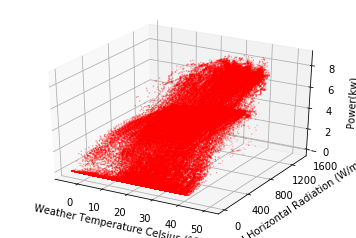

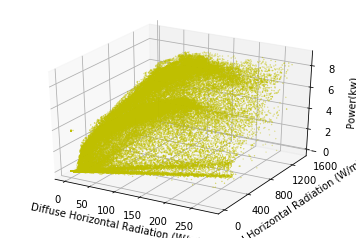

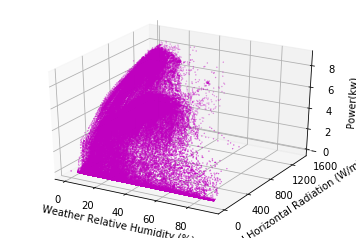

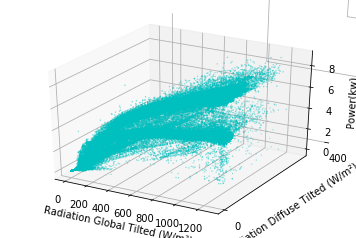

In [62]:
from mpl_toolkits.mplot3d import Axes3D

# plt.figure(figsize=(6.5, 4)) 
x = train_1A['WTC']
y = train_1A['GHR']
z = train_1A['1A Trina_power']
ax = plt.subplot(projection='3d')  # 创建一个三维的绘图工程
ax.scatter(x, y, z,s=0.1,c='r')  # 绘制数据点,颜色是红色     ['c', 'b', 'g', 'r', 'm', 'y', 'k', 'w']
 
ax.set_zlabel('Power(kw)')  # 坐标轴
ax.set_xlabel('Weather Temperature Celsius (°C)')
ax.set_ylabel('Global Horizontal Radiation (W/m²)')
plt.yticks([0,400,800,1200,1600])
# plt.savefig('../picture/WTC_GHR_Power.svg',dpi=300,format='svg')
plt.savefig('../picture/WTC_GHR_Power.jpg')
plt.show()
# plt.savefig('../picture/WTC_GHR_Power.jpg')
# plt.draw()
# plt.pause(10)
# plt.savefig('../picture/3D.jpg')
# plt.close()
##############
# plt.figure(figsize=(6.5, 4)) 
x = train_1A['DHR']
y = train_1A['GHR']
z = train_1A['1A Trina_power']
ax = plt.subplot(projection='3d')  # 创建一个三维的绘图工程
ax.scatter(x, y, z,s=0.1,c='y')  # 绘制数据点,
 
ax.set_zlabel('Power(kw)')  # 坐标轴
ax.set_xlabel('Diffuse Horizontal Radiation (W/m²)')
ax.set_ylabel('Global Horizontal Radiation (W/m²)')
plt.yticks([0,400,800,1200,1600])
plt.savefig('../picture/DHR_GHR_Power.jpg')
plt.show()

######################
# plt.figure(figsize=(6.5, 4)) 
x = train_1A['WRH']
y = train_1A['GHR']
z = train_1A['1A Trina_power']
ax = plt.subplot(projection='3d')  # 创建一个三维的绘图工程
ax.scatter(x, y, z,s=0.1,c='m')  # 绘制数据点,颜
 
ax.set_zlabel('Power(kw)')  # 坐标轴
ax.set_xlabel('Weather Relative Humidity (%)')
ax.set_ylabel('Global Horizontal Radiation (W/m²)')
plt.yticks([0,400,800,1200,1600])
plt.savefig('../picture/WHR_GHR_Power.jpg')
plt.show()

########
# plt.figure(figsize=(6.5, 4)) 
x = train_1A['RGT']
y = train_1A['RDT']
z = train_1A['1A Trina_power']
ax = plt.subplot(projection='3d')  # 创建一个三维的绘图工程
ax.scatter(x, y, z,s=0.1,c='c')  # 绘制数据点,颜
 
ax.set_zlabel('Power(kw)')  # 坐标轴
ax.set_xlabel('Radiation Global Tilted (W/m²)')
ax.set_ylabel('Radiation Diffuse Tilted (W/m²)')
plt.yticks([0,400,800,1200,1600])
plt.savefig('../picture/RGT_RDT_Power.jpg')
plt.show()



# 批量化数据保存

In [ ]:
#选取站点一
# train_1A=train.drop(columns=['Timestamp','1B Trina_power','2 eco_power','3 BP_power',
#         '4 Kyocera_power',
#         '5 Kyocera_power',
#          '6 Kyocera_power',
#          '7 First_power',
#          '8 Kaneka_power',
#         'DKA.Meter1_power',
#         'DKA.Meter2_power'],inplace=True)

In [ ]:
site = list(['1A Trina_power','1B Trina_power','2 eco_power','3 BP_power',
        '4 Kyocera_power',
        '5 Kyocera_power',
         '6 Kyocera_power',
         '7 First_power',
         '8 Kaneka_power'])

trainnames=list()
testnames=list()
trainfiles=list()
testfiles=list()

trainnames += [('train_%s' % (j) ).strip('_power')for j in site]
testnames += [('test_%s' % (j) ).strip('_power')for j in site]

trainfiles += [('../Dataset/train/%s.csv' % (j) ) for j in trainnames]
testfiles += [('../Dataset/test/%s.csv' % (j) ) for j in testnames]

for i in range(0, len(site)):
    trainnames[i]=train[['Year', 'Month', 'Day', 'Hour', 'Minutes','WTC', 'WRH', 'GHR', 'DHR', 'WD', 'WDR', 'RGT', 'RDT',
       site[i]]]
    testnames[i]=test[['Year', 'Month', 'Day', 'Hour', 'Minutes','WTC', 'WRH', 'GHR', 'DHR', 'WD', 'WDR', 'RGT', 'RDT',
       site[i]]]
    
    trainnames[i].to_csv(trainfiles[i],index=True)
    testnames[i].to_csv(testfiles[i],index=True)